# 🏠 Real Estate Data Analysis - Practice Problems

This notebook contains **12 practice problems** to help you learn data analysis using a real estate dataset.

**Dataset:** `real_estate_data.csv`

**Columns:**
- `property_id` - Unique identifier
- `address` - Street address
- `city`, `state` - Location
- `price` - Listing/Sale price
- `bedrooms`, `bathrooms` - Number of beds/baths
- `sqft` - Square footage
- `lot_size` - Lot size in sqft
- `year_built` - Year property was built
- `property_type` - Single Family, Condo, Townhouse
- `listing_status` - Active, Pending, Sold
- `days_on_market` - Days listed
- `agent_name` - Real estate agent
- `sale_date` - Date sold (if applicable)

In [1]:
# Setup - Run this cell first!
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('real_estate_data.csv')

# Preview the data
df.head()

,property_id,address,city,state,price,bedrooms,bathrooms,sqft,lot_size,year_built,property_type,listing_status,days_on_market,agent_name,sale_date
0,1,123 Oak Street,Los Angeles,CA,850000,4,3,2200,5500,2005,Single Family,Sold,45,Sarah Johnson,2024-01-15
1,2,456 Maple Avenue,San Francisco,CA,1250000,3,2,1800,3200,1998,Condo,Sold,30,Michael Chen,2024-01-20
2,3,789 Pine Road,Seattle,WA,725000,3,2,1650,4800,2010,Single Family,Active,22,Emily Davis,NaN
3,4,321 Cedar Lane,Portland,OR,485000,2,1,1200,2800,1985,Townhouse,Sold,60,James Wilson,2024-02-01
4,5,654 Birch Court,Denver,CO,595000,4,2,1950,6200,2015,Single Family,Active,15,Lisa Martinez,NaN


In [2]:
# Check the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_id     50 non-null     int64 
 1   address         50 non-null     object
 2   city            50 non-null     object
 3   state           50 non-null     object
 4   price           50 non-null     int64 
 5   bedrooms        50 non-null     int64 
 6   bathrooms       50 non-null     int64 
 7   sqft            50 non-null     int64 
 8   lot_size        50 non-null     int64 
 9   year_built      50 non-null     int64 
 10  property_type   50 non-null     object
 11  listing_status  50 non-null     object
 12  days_on_market  50 non-null     int64 
 13  agent_name      50 non-null     object
 14  sale_date       23 non-null     object
dtypes: int64(8), object(7)
memory usage: 6.0+ KB


In [37]:
df.isnull().sum()

property_id        0
address            0
city               0
state              0
price              0
bedrooms           0
bathrooms          0
sqft               0
lot_size           0
year_built         0
property_type      0
listing_status     0
days_on_market     0
agent_name         0
sale_date         27
price_per_sqft     0
price_tier         0
dtype: int64

---
## Problem 1: Basic Statistics

**Question:** What is the average, minimum, and maximum price of all properties in the dataset?

In [3]:
# Your code here
df1 = df.agg({
    'price': ['mean', 'min', 'max']
})
df1


,price
mean,486000.0
min,245000.0
max,1450000.0


---
## Problem 2: Filtering Data

**Question:** Find all properties in California (CA) that are priced above $800,000. Display the address, city, price, and bedrooms.

In [18]:
# Your code here
california_800k = df[(df['state'] == 'CA') & (df['price'] > 800000)]
california_800k[['address','city','price','bedrooms']].sort_values(by='price', ascending=False).head()

,address,city,price,bedrooms
1,456 Maple Avenue,San Francisco,1250000,3
19,834 Alder Avenue,San Jose,1100000,4
8,369 Redwood Place,San Diego,925000,4
0,123 Oak Street,Los Angeles,850000,4


---
## Problem 3: Grouping and Aggregation

**Question:** Calculate the average property price for each state. Sort the results from highest to lowest average price.

In [5]:
# Your code here
average_price_each_state = df.groupby('state')['price'].mean().sort_values(ascending=False)
average_price_each_state


state
MA    890000.000000
CA    865833.333333
NY    847500.000000
WA    725000.000000
IL    525000.000000
CO    520000.000000
FL    498333.333333
UT    485000.000000
OR    485000.000000
MN    465000.000000
MD    425000.000000
RI    415000.000000
TX    410000.000000
AZ    403333.333333
CT    395000.000000
GA    395000.000000
PA    390000.000000
ID    385000.000000
NV    382500.000000
NC    372500.000000
TN    365000.000000
VA    360000.000000
MO    340000.000000
KY    315000.000000
NM    310000.000000
OH    305000.000000
IN    295000.000000
WI    285000.000000
NE    275000.000000
OK    265000.000000
Name: price, dtype: float64

---
## Problem 4: Value Counts

**Question:** How many properties are there for each listing status (Active, Pending, Sold)? Show both the count and percentage.

In [23]:
properties_listing_status = (
    df['listing_status']
    .value_counts()
    .reset_index(name='count')
)
properties_listing_status


,listing_status,count
0,Sold,23
1,Active,18
2,Pending,9


In [31]:
properties_listing_status.plot(
    kind='pie',
    xlabel='listing_status',
    ylabel='count',
    title='Listing Status Distribution',
    
)

ValueError: pie requires either y column or 'subplots=True'

<Axes: title={'center': 'Listing Status Distribution'}, ylabel='count'>

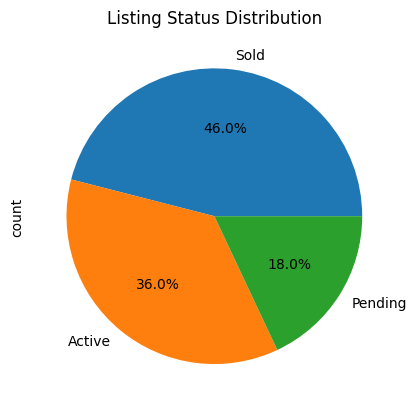

In [ ]:
properties_listing_status.plot(
    kind='pie',
    y='count',
    labels=properties_listing_status['listing_status'],
    autopct='%1.1f%%',
    title='Listing Status Distribution',
    legend=False
)




---
## Problem 5: Creating New Columns

**Question:** Create a new column called `price_per_sqft` that calculates the price per square foot for each property. Then find the top 5 properties with the highest price per sqft.

In [33]:
# Your code here
df['price_per_sqft'] = (df['price'] / df['sqft']).round(2)
df.sort_values(by='price_per_sqft', ascending=False).head()

,property_id,address,city,state,price,bedrooms,bathrooms,sqft,lot_size,year_built,property_type,listing_status,days_on_market,agent_name,sale_date,price_per_sqft,price_tier
15,16,489 Chestnut Drive,New York,NY,1450000,2,2,1400,0,2020,Condo,Sold,38,Andrew Lewis,2024-02-08,1035.71,Luxury
1,2,456 Maple Avenue,San Francisco,CA,1250000,3,2,1800,3200,1998,Condo,Sold,30,Michael Chen,2024-01-20,694.44,Luxury
14,15,378 Walnut Street,Boston,MA,890000,3,2,1650,2800,1988,Condo,Active,12,Stephanie Clark,NaN,539.39,Luxury
19,20,834 Alder Avenue,San Jose,CA,1100000,4,3,2150,4800,2016,Single Family,Sold,40,Justin Young,2024-02-12,511.63,Luxury
2,3,789 Pine Road,Seattle,WA,725000,3,2,1650,4800,2010,Single Family,Active,22,Emily Davis,NaN,439.39,Luxury


---
## Problem 6: Multiple Conditions Filter

**Question:** Find all Single Family homes with 4+ bedrooms that are priced under $500,000. Which states have these affordable family homes?

In [36]:
# Your code here
df2 = df[(df['bedrooms'] >= 4) & (df['price'] <= 500_000) & (df['property_type'] =='Single Family')] 
df2[['city','state','price','bedrooms','property_type']]


,city,state,price,bedrooms,property_type
11,Nashville,TN,445000,4,Single Family
16,Dallas,TX,475000,4,Single Family
21,Orlando,FL,425000,4,Single Family
23,Minneapolis,MN,465000,4,Single Family
26,Salt Lake City,UT,485000,4,Single Family
29,Indianapolis,IN,295000,4,Single Family
32,Albuquerque,NM,310000,4,Single Family
35,Louisville,KY,315000,4,Single Family
38,Pittsburgh,PA,345000,4,Single Family
41,Riverside,CA,495000,4,Single Family


---
## Problem 7: Handling Missing Values

**Question:** How many properties have NOT been sold (have missing sale_date)? What percentage of total properties does this represent?

In [ ]:
# Your code here
property_not_sold = df[df['listing_status'] != 'Sold']





TypeError: 'Categorical' with dtype category does not support reduction 'sum'

In [39]:
# Count properties NOT sold (missing sale_date)
not_sold_count = df['sale_date'].isna().sum()

# Total properties
total_properties = len(df)

# Percentage formula
percentage_not_sold = (not_sold_count / total_properties) * 100

# Display results
print(f"Properties not sold: {not_sold_count}")
print(f"Total properties: {total_properties}")
print(f"Percentage not sold: {percentage_not_sold:.2f}%")

Properties not sold: 27
Total properties: 50
Percentage not sold: 54.00%


---
## Problem 8: Groupby with Multiple Aggregations

**Question:** For each property type, calculate:
- Count of properties
- Average price
- Average square footage
- Average days on market

In [10]:
# Your code here

property_type_data = df.groupby('property_type').agg(
    total_properties = ('property_type', 'count'),
    average_pruce = ('price','mean'),
    average_square_footage = ('sqft','mean'),
    avg_days_on_market = ('days_on_market','mean')
).sort_values(by='total_properties',ascending=False)

property_type_data

,total_properties,average_pruce,average_square_footage,avg_days_on_market
property_type,,,,
Single Family,39,440769.230769,1756.410256,34.974359
Townhouse,6,417500.000000,1516.666667,34.000000
Condo,5,921000.000000,1600.000000,35.400000


---
## Problem 9: Conditional Column Creation

**Question:** Create a new column called `price_tier` that categorizes properties as:
- 'Budget' if price < $350,000
- 'Mid-Range' if price is between $350,000 and $600,000
- 'Luxury' if price > $600,000

Then count how many properties are in each tier.

In [11]:
# Your code here
bins = [0, 350_000, 600_000, float('inf')]
labels = ['Budget', 'Mid-Range', 'Luxury']


df['price_tier'] = pd.cut(df['price'],bins=bins,labels=labels,include_lowest=True)
df.head()

,property_id,address,city,state,price,bedrooms,bathrooms,sqft,lot_size,year_built,property_type,listing_status,days_on_market,agent_name,sale_date,price_per_sqft,price_tier
0,1,123 Oak Street,Los Angeles,CA,850000,4,3,2200,5500,2005,Single Family,Sold,45,Sarah Johnson,2024-01-15,386.36,Luxury
1,2,456 Maple Avenue,San Francisco,CA,1250000,3,2,1800,3200,1998,Condo,Sold,30,Michael Chen,2024-01-20,694.44,Luxury
2,3,789 Pine Road,Seattle,WA,725000,3,2,1650,4800,2010,Single Family,Active,22,Emily Davis,NaN,439.39,Luxury
3,4,321 Cedar Lane,Portland,OR,485000,2,1,1200,2800,1985,Townhouse,Sold,60,James Wilson,2024-02-01,404.17,Mid-Range
4,5,654 Birch Court,Denver,CO,595000,4,2,1950,6200,2015,Single Family,Active,15,Lisa Martinez,NaN,305.13,Mid-Range


---
## Problem 10: Top Performers Analysis

**Question:** Which real estate agent has sold the most properties? Also find the total sales value for the top 5 agents by number of sales.

In [12]:
count_unique_name = df['agent_name'].nunique()
print(count_unique_name)

50


In [13]:
# Your code here
top_performer = df.groupby('agent_name').agg({
    'listing_status':'count'
    }).reset_index()
top_performer = top_performer.sort_values('listing_status',ascending=False)
top_performer

,agent_name,listing_status
0,Alex Martin,1
1,Alexis King,1
2,Amanda Taylor,1
3,Amber Scott,1
4,Andrew Lewis,1
5,Ashley King,1
6,Austin Walker,1
7,Brandon Hall,1
8,Brandon Lewis,1
9,Brittany Adams,1


---
## Problem 11: Correlation Analysis

**Question:** What is the correlation between:
1. Price and Square Footage
2. Price and Number of Bedrooms
3. Days on Market and Price

Which factor has the strongest correlation with price?

In [14]:
# Your code here


---
## Problem 12: Property Age Analysis

**Question:** Create a column called `property_age` (current year 2024 minus year_built). Then:
1. What is the average age of properties by property type?
2. Find properties built in the last 10 years (2014 or later) that are still Active. How many are there and what's their average price?

In [15]:
# Your code here


---
## 🎉 Bonus Challenge

**Question:** Create a comprehensive market analysis by state that includes:
- Total number of properties
- Number of sold properties
- Average sale price
- Median days on market
- Most common property type

Sort by total number of properties descending.

In [16]:
# Your code here
